<a href="https://colab.research.google.com/github/Yashaswi04/Data-Science--VCET/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1. Import the datset
import pandas as pd

# Step 1: Import the dataset
df = pd.read_csv("creditcard.csv")

# Step 2: Display the dataset
print(df.head())  # Display the first few rows to understand the structure

# Optionally, you can print column names to understand the features available
print(df.columns)


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:

#2. dealing with missing value
import pandas as pd

# Step 1: Import the dataset (replace with your actual dataset path)
df = pd.read_csv("creditcard.csv")

# Step 2: Handle missing values
# Impute missing numerical values with median
df['Amount'].fillna(df['Amount'].median(), inplace=True)  # Replace 'Amount' with your transaction amount feature

# Impute missing categorical values with mode
df['Time'].fillna(df['Time'].median(), inplace=True)  # Replace 'Time' with your timestamp feature
df['Class'].fillna(df['Class'].mode()[0], inplace=True)  # Replace 'Class' with your target variable (fraud or not)

# Step 3: Print the updated count of missing values (optional)
print(df.isnull().sum())

# Step 4: Display the first few rows to verify the changes
print(df.head())



Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -

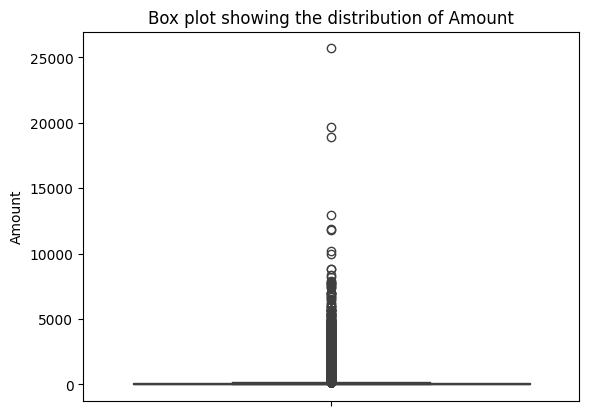

Upper bound: 184.5125
Lower bound: -101.7475
0         149.6200
1           2.6900
2         184.5125
3         123.5000
4          69.9900
            ...   
284802      0.7700
284803     24.7900
284804     67.8800
284805     10.0000
284806    184.5125
Name: Amount, Length: 284807, dtype: float64


In [4]:

#3. Dealing with outliers
from matplotlib import pyplot as plt
import seaborn as sns

# Step 1: Identify outliers
sns.boxplot(df['Amount'])
plt.title('Box plot showing the distribution of Amount')
plt.show()

# Step 2: Calculate quartiles and IQR
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Define upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print("Upper bound:", upper_bound)
print("Lower bound:", lower_bound)

# Step 4: Replace outliers with upper or lower bound
df['Amount'] = df['Amount'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Step 5: Display the updated 'Amount' column after handling outliers
print(df['Amount'])


In [8]:
# 4. Convert categorical variables into numeric using one-hot encoding
import pandas as pd

# Step 1: Import the dataset (replace with your actual dataset path)
df = pd.read_csv("creditcard.csv")

# Step 2: Check for the presence and correct naming of columns
print(df.columns)  # Print the column names to verify

# Step 3: Convert categorical variables (if they exist) into numeric using one-hot encoding
# Adjust column names if necessary based on the output of Step 2
if 'TransactionType' in df.columns and 'Merchant' in df.columns:
    df = pd.get_dummies(df, columns=['TransactionType', 'Merchant'], drop_first=True)
    print(df.head())
else:
    print("Columns 'TransactionType' and/or 'Merchant' not found in the dataset.")

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Columns 'TransactionType' and/or 'Merchant' not found in the dataset.


In [13]:
#5. Select features and target

import pandas as pd

# Step 1: Import the dataset (replace with your actual dataset path)
df = pd.read_csv("creditcard.csv")

# Step 2: Select features and target
features = ['Amount', 'Time']
X = df[features]
y = df['Class']  # Assuming 'Class' is the target variable indicating fraud (1) or not (0)

print(y)


0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64


In [14]:
#6. Dealing with class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
import pandas as pd

# Step 1: Import the dataset (replace with your actual dataset path)
df = pd.read_csv("creditcard.csv")

# Step 2: Select features and target
features = ['Amount', 'Time']
X = df[features]
y = df['Class']  # Assuming 'Class' is the target variable indicating fraud (1) or not (0)

# Step 3: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

# Step 4: Verify the balancing
print(y_sm.value_counts())


Class
0    284315
1    284315
Name: count, dtype: int64


In [15]:

# 7. Standardize the features
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Import the dataset (replace with your actual dataset path)
df = pd.read_csv("creditcard.csv")

# Step 2: Select features and target
features = ['Amount', 'Time']
X = df[features]
y = df['Class']  # Assuming 'Class' is the target variable indicating fraud (1) or not (0)

# Step 3: Apply SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

# Step 4: Standardize the features
scaler = StandardScaler()
X_sm = scaler.fit_transform(X_sm)

print(X_sm)


[[ 0.24551614 -1.82493094]
 [-0.42127713 -1.82493094]
 [ 1.2849385  -1.82491016]
 ...
 [ 0.03161778 -1.10608569]
 [-0.16869688  0.86995989]
 [ 0.21943414  0.07589725]]


In [16]:

#8. Dimensionality reduction using PCA
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Step 1: Import the dataset (replace with your actual dataset path)
df = pd.read_csv("creditcard.csv")

# Step 2: Select features and target
features = ['Amount', 'Time']
X = df[features]
y = df['Class']  # Assuming 'Class' is the target variable indicating fraud (1) or not (0)

# Step 3: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

# Step 4: Standardize the features
scaler = StandardScaler()
X_sm = scaler.fit_transform(X_sm)

# Step 5: Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sm)

# Step 6: Check explained variance ratio
print(pca.explained_variance_ratio_)


[0.50856601 0.49143399]


In [17]:

#9. Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

# Step 1: Import the dataset (replace with your actual dataset path)
df = pd.read_csv("creditcard.csv")

# Step 2: Select features and target
features = ['Amount', 'Time']
X = df[features]
y = df['Class']  # Assuming 'Class' is the target variable indicating fraud (1) or not (0)

# Step 3: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

# Step 4: Standardize the features
scaler = StandardScaler()
X_sm = scaler.fit_transform(X_sm)

# Step 5: Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sm)

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_sm, test_size=0.2, random_state=42)

# Step 7: Verify the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(454904, 2) (113726, 2) (454904,) (113726,)


In [20]:

#10. Train a Random Forest Classifier and a Gradient Boosting Classifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2: Train the Random Forest model
rf_classifier.fit(X_train, y_train)

# Step 3: Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Step 4: Verify predictions (optional)
print("Random Forest Classifier Predictions:")
print(y_pred_rf)

# Step 5: Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Step 6: Train the Gradient Boosting model
gb_classifier.fit(X_train, y_train)

# Step 7: Make predictions
y_pred_gb = gb_classifier.predict(X_test)

# Step 8: Verify predictions (optional)
print("\nGradient Boosting Classifier Predictions:")
print(y_pred_gb)

# Step 9: Evaluate model performance (optional)
print("\nRandom Forest Classifier Metrics:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nGradient Boosting Classifier Metrics:")
print(classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))


Random Forest Classifier Predictions:
[1 1 0 ... 1 1 1]

Gradient Boosting Classifier Predictions:
[0 0 0 ... 1 0 0]

Random Forest Classifier Metrics:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     56750
           1       0.87      0.89      0.88     56976

    accuracy                           0.88    113726
   macro avg       0.88      0.88      0.88    113726
weighted avg       0.88      0.88      0.88    113726

Accuracy: 0.8812760494521921

Gradient Boosting Classifier Metrics:
              precision    recall  f1-score   support

           0       0.71      0.68      0.69     56750
           1       0.69      0.72      0.71     56976

    accuracy                           0.70    113726
   macro avg       0.70      0.70      0.70    113726
weighted avg       0.70      0.70      0.70    113726

Accuracy: 0.700305998628282


In [21]:
# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming y_pred contains the predictions from your model
# Replace with your actual predictions and true labels
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.8812760494521921
Confusion Matrix:
[[49295  7455]
 [ 6047 50929]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     56750
           1       0.87      0.89      0.88     56976

    accuracy                           0.88    113726
   macro avg       0.88      0.88      0.88    113726
weighted avg       0.88      0.88      0.88    113726



In [23]:
# Initialize and train the Gradient Boosting classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting classifier
gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gbm.fit(X_train, y_train)

# Make predictions
y_pred_gbm = gbm.predict(X_test)

# Evaluate the Gradient Boosting model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
class_report_gbm = classification_report(y_test, y_pred_gbm)

# Print evaluation metrics
print(f'Gradient Boosting Accuracy: {accuracy_gbm}')
print('Gradient Boosting Confusion Matrix:')
print(conf_matrix_gbm)
print('Gradient Boosting Classification Report:')
print(class_report_gbm)


Gradient Boosting Accuracy: 0.700305998628282
Gradient Boosting Confusion Matrix:
[[38526 18224]
 [15859 41117]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.68      0.69     56750
           1       0.69      0.72      0.71     56976

    accuracy                           0.70    113726
   macro avg       0.70      0.70      0.70    113726
weighted avg       0.70      0.70      0.70    113726



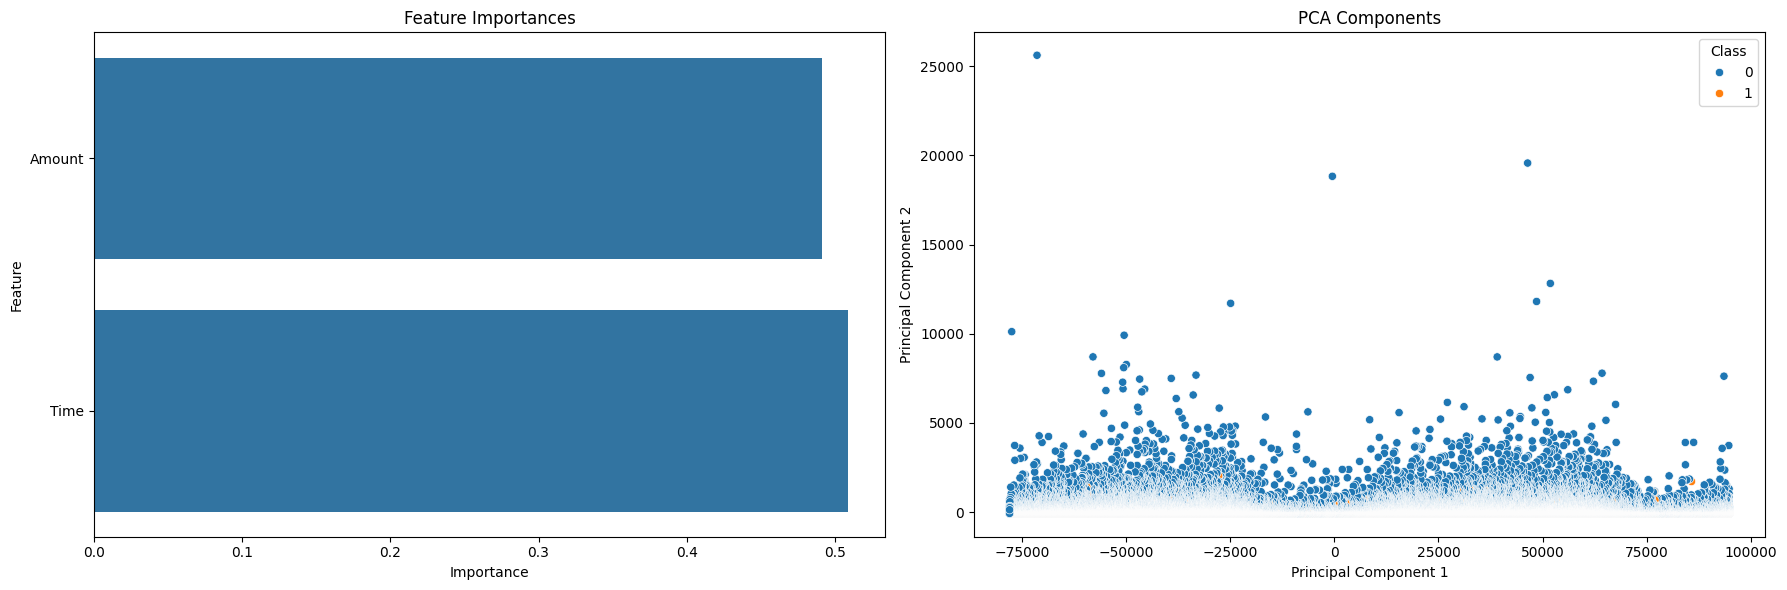

In [26]:
#11. Visualize feature importances
import seaborn as sns
import matplotlib.pyplot as plt

# Example feature importances (replace with actual values)
feature_importances = rf_classifier.feature_importances_
features = X.columns  # Use original feature names before PCA

# Example PCA components (replace with actual values)
X_pca = pca.fit_transform(X)  # Use X_pca calculated in step 10

# Visualize feature importances
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Visualize PCA components
plt.subplot(1, 2, 2)
# Use y (original labels) as hue since X_pca is based on original data
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.title('PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')

plt.tight_layout()
plt.show()